In [3]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import signal
from scipy import interpolate

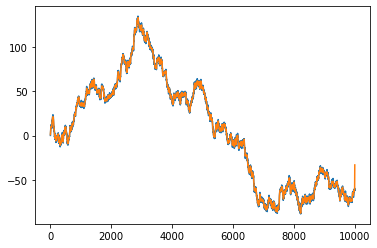

In [4]:
# create signal
N = 10000


timevec = np.arange(N)/N 
tsO = np.cumsum(np.random.randn(N))

k = 11
ts = np.convolve(tsO,np.ones(k)/k,mode = 'same')

plt.plot(tsO)
plt.plot(ts)

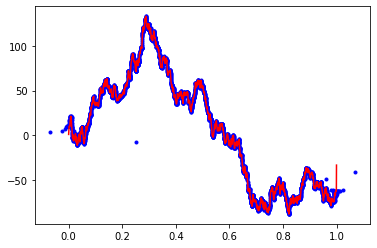

In [5]:
ts_ds = signal.resample(ts,int(N/2))
timevec_ds = signal.resample(timevec,int(N/2))

plt.plot(timevec_ds,ts_ds,'b.')
plt.plot(timevec,ts,'r')

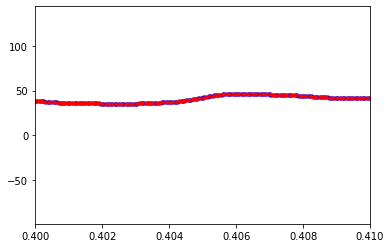

In [6]:
ts_us = signal.resample(ts,N*3)
timevec_us = signal.resample(timevec,N*3)

plt.plot(timevec_us,ts_us,'b.')
plt.xlim([.4,.41])
plt.plot(timevec,ts,'r.')

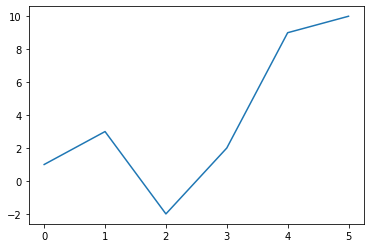

In [7]:
sig = np.array([1,3,-2,2,9,10])
plt.plot(sig)

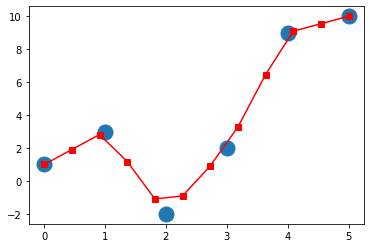

In [8]:
# interpolation using numpy

interp_factor = 2
interp_points = np.linspace(0,len(sig)-1,int(len(sig))*interp_factor)
orig_points = np.arange(0,len(sig))
interp_sig = np.interp(interp_points,orig_points,sig)

plt.plot(sig,'o',markersize =15)
plt.plot(interp_points,interp_sig,'rs-')

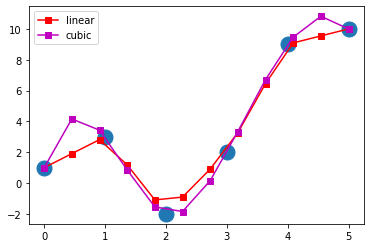

In [9]:
# using scipy

interp_funL = interpolate.interp1d(orig_points,sig,kind = 'linear')
interp_sigL = interp_funL(interp_points)

interp_funC = interpolate.interp1d(orig_points,sig,kind = 'cubic')
interp_sigC = interp_funC(interp_points)


plt.plot(sig,'o',markersize =15)
plt.plot(interp_points,interp_sigL,'rs-',label = 'linear')
plt.plot(interp_points,interp_sigC,'ms-',label = 'cubic')
plt.legend()

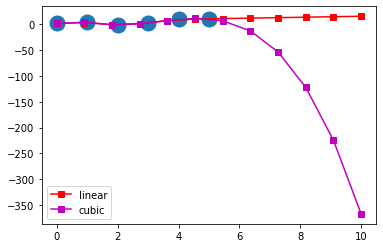

In [10]:
# extrapolation

extrap_points = np.linspace(0,(len(sig)-1)*2,int(len(sig)*interp_factor))

interp_funL = interpolate.interp1d( orig_points,sig,kind = 'linear',bounds_error = False,fill_value='extrapolate' )
interp_sigL = interp_funL(extrap_points)

interp_funC = interpolate.interp1d(orig_points,sig,kind = 'cubic',bounds_error = False,fill_value='extrapolate')
interp_sigC = interp_funC(extrap_points)


plt.plot(sig,'o',markersize =15)
plt.plot(extrap_points,interp_sigL,'rs-',label = 'linear')
plt.plot(extrap_points,interp_sigC,'ms-',label = 'cubic')
plt.legend()

(0.6, 0.6005)

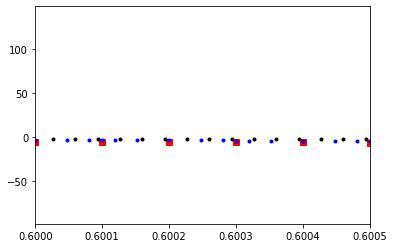

In [17]:
interp_funL = interpolate.interp1d(timevec_us,ts_us)

timevec_usRegular = np.linspace(timevec[0],timevec[-1],len(timevec_us))

ts_usRegular = interp_funL(timevec_usRegular)

plt.plot(timevec,ts,'rs',label ='org' )
plt.plot(timevec_us,ts_us+2,'b.',label ='ups' )
plt.plot(timevec_usRegular,ts_usRegular+4,'k.',label = 'ups + interpo')
plt.xlim([.6,.6005])

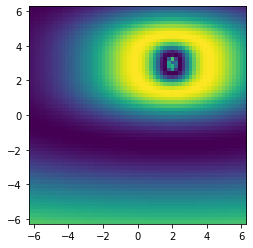

In [25]:
# Fix corrupted image with interpolation

x = np.linspace(-2*np.pi,2*np.pi,60)
X,Y = np.meshgrid(x,x)

Q = np.log((X-2)**2+np.abs((Y-3)**3))
Zgood = np.sin(Q)

plt.imshow(Zgood,extent = [x[0],x[-1],x[0],x[-1]],origin = 'top')

In [28]:
# select pixels to demolish

prop_bad_pixels = 0.1
num_elements = np.prod(Zgood.shape)

badpix_idx = np.random.rand(int(num_elements*prop_bad_pixels))*num_elements
badpix_idx = np.floor(badpix_idx).astype(int)

In [32]:
# destroy pixels
Z = Zgood.copy()
i,j=np.unravel_index(badpix_idx,Zgood.shape)
Z[i,j] = np.nan

In [43]:
# find a list of good pixel and bad pixel

badidx_i,badidx_j = np.where(np.isnan(Z))
goodidx_i,goodidx_j = np.where(np.isfinite(Z))

# interpolation instance using griddata

Z_newpix = interpolate.griddata((goodidx_i,goodidx_j),Z[goodidx_i,goodidx_j],(badidx_i,badidx_j))
Z_interp = Z.copy()
Z_interp[badidx_i,badidx_j] = Z_newpix

Text(0.5, 1.0, 'Diff')

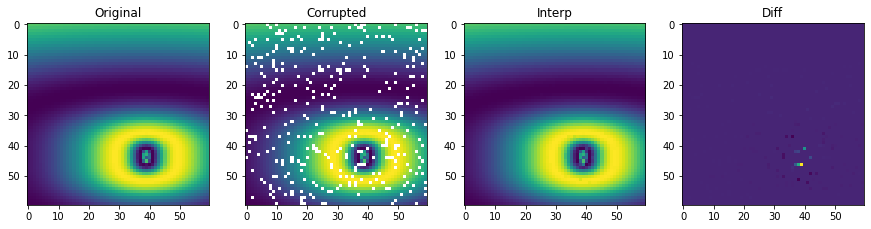

In [45]:
fig,ax = plt.subplots(1,4,figsize = (15,6))
ax[0].imshow(Zgood)
ax[0].set_title('Original')

ax[1].imshow(Z)
ax[1].set_title('Corrupted')

ax[2].imshow(Z_interp)
ax[2].set_title('Interp')

ax[3].imshow(Z_interp-Zgood)
ax[3].set_title('Diff')